# Summarizing metrics from single horizontal lines

Leanne Friedrich 08/02/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [3]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)
ss['horiz_segments'] = seg['horiz_segments']

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'v

In [4]:
vs,uv = me.importStillsSummary(file='videoSummary.csv', diag=True)

Independents: ['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['projectionN', 'projectionN_N', 'projShiftN', 'projShiftN_N', 'vertDispBotN', 'vertDispBotN_N', 'vertDispTopN', 'vertDispTopN_N', 

# horizontal

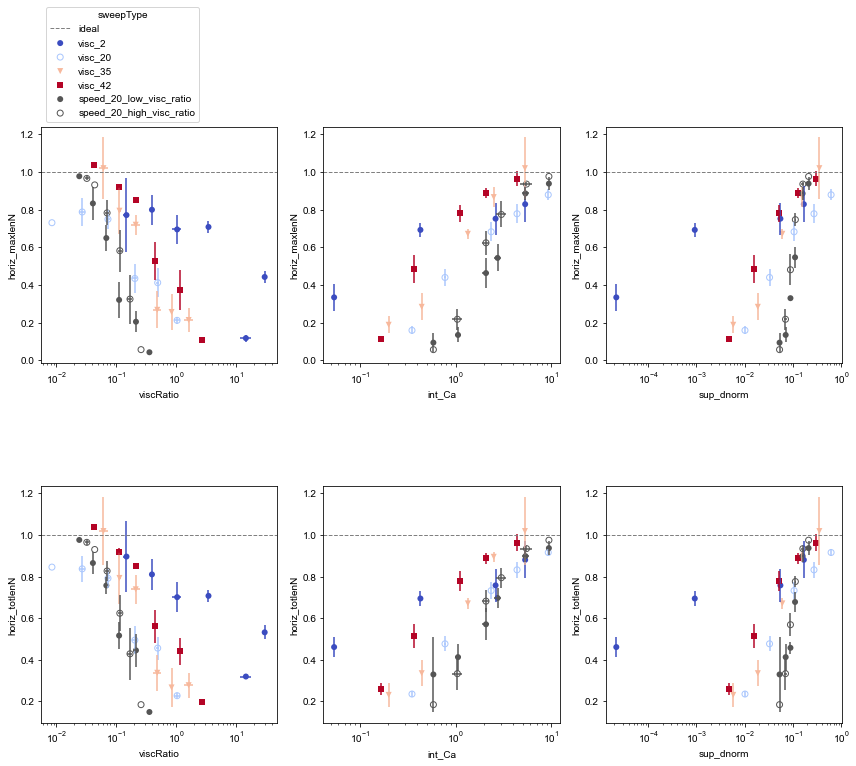

In [99]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(2,3,figsize=(12,12))
for j,s2 in enumerate(['viscRatio', 'int_Ca', 'sup_dnorm']):
    for i,s in enumerate(['horiz_maxlenN', 'horiz_totlenN']):
        mp.scatterSS(ss1[ss1.sweepType.str.startswith('visc')], s2, s, 'sweepType', logx=True, yideal=([1,1][i]), ax=axs[i][j], fig=fig, legend=(i==0 and j==0), dx=0.2)
        mp.scatterSS(ss1[ss1.sweepType.str.startswith('speed')], s2, s, 'sweepType', logx=True, ax=axs[i][j], fig=fig, legend=(i==0 and j==0), color='#555555', dx=0.2)
fig.tight_layout()

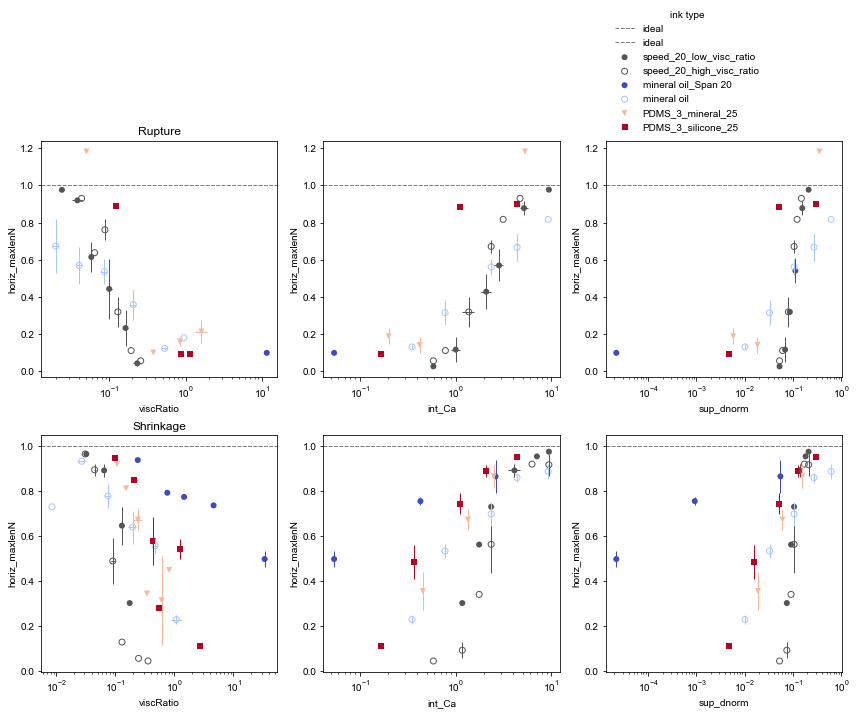

In [22]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.horiz_segments>3]
ss2 = ss.copy()
ss2 = ss2[ss2.sigma>0]
ss2 = ss2[ss2.horiz_segments==3]
ss1 = ss1.sort_values(by='sigma')
ss2 = ss2.sort_values(by='sigma')
fig,axs = plt.subplots(2,3,figsize=(12,10))
for j,s2 in enumerate(['viscRatio', 'int_Ca', 'sup_dnorm']):
    for i,ssi in enumerate([ss1,ss2]):
        mp.sweepTypeSS(ssi, s2, 'horiz_maxlenN', logx=True, logy=False, yideal=1, ax=axs[i][j], fig=fig, legend=((j==2)&(i==0)), dx=0.2)
axs[0][0].set_title('Rupture')
axs[1][0].set_title('Shrinkage')
fig.tight_layout()

In [172]:
ss1[ss1.horiz_meanTN>2][['bn', 'horiz_meanTN']]

,bn,horiz_meanTN
454,I_3.00_S_3.00_VI_2.5_VS_10_211109,16.890154
466,I_3.00_S_3.00_VI_40_VS_5_211109,2.043136


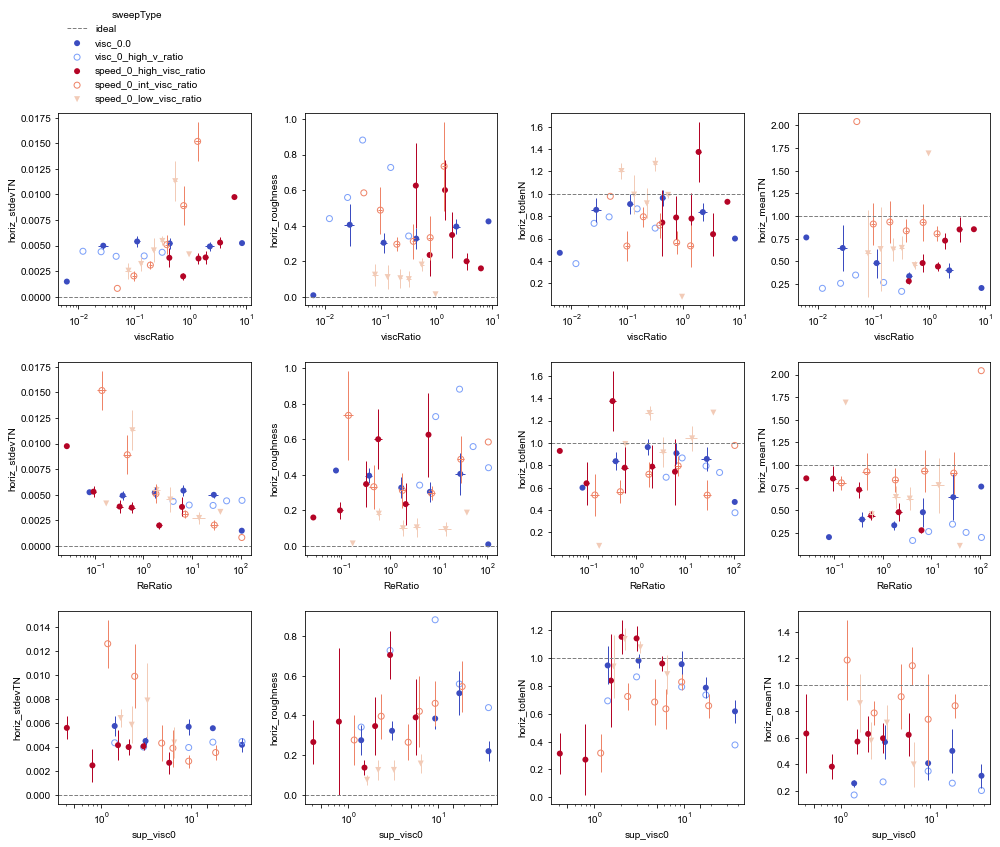

In [174]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma==0]
ss1 = ss1[ss1.sweepType!='visc_PEG']
ss1 = ss1.sort_values(by='sweepType')
fig,axs = plt.subplots(3,4,figsize=(14, 12))
for j,s2 in enumerate(['viscRatio', 'ReRatio', 'sup_visc0']):
    for i,s in enumerate(['horiz_stdevTN','horiz_roughness', 'horiz_totlenN', 'horiz_meanTN']):
        mp.sweepTypeSS(ss1, s2, s, logx=True, yideal=([0,0,1,1,3][i]), ax=axs[j][i], fig=fig, legend=(i==0 and j==0), dx=0.2)
fig.tight_layout()

In [107]:
ss[(ss.sweepType=='visc_42')&(ss.int_Ca<0.2)][['bn', 'horiz_roughness', 'horiz_roughness_SE']]

,bn,horiz_roughness,horiz_roughness_SE
359,I_PDMSS10_S_2.25_210713,0.000000,0.000000
369,I_PDMSS5_S_2.25_210713,0.000000,0.000000
373,I_PDMSS7.5_S_2.25_210713,0.019582,0.019582


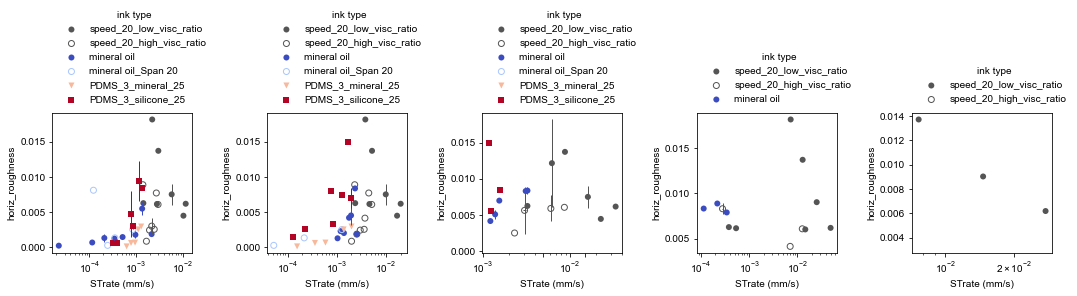

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [175]:
ssca = ss.copy()
ssca = ssca[ssca.sigma>0]
ssca.sort_values(by='sigma')
ssca = ssca[ssca.horiz_roughness_SE<0.1]
ssca = ssca[ssca.horiz_segments==3]

u['STrate'] = 'mm/s'
fig,axs = plt.subplots(1, 5, figsize=(15, 4))
for i, ki in enumerate([-3.5, -3.25, -3, -2.75, -2.5]):
    k = 10**ki
    ssca['STrate'] = (k*ssca['ink_v']*(ssca['sup_visc0']-ssca['ink_visc0'])-k**3*ssca['sigma']/(ssca['dEst']/1000)**2)/(ssca['ink_visc0']+ssca['sup_visc0'])
    mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness', ax=axs[i], logx=True, units=u)
fig.tight_layout()

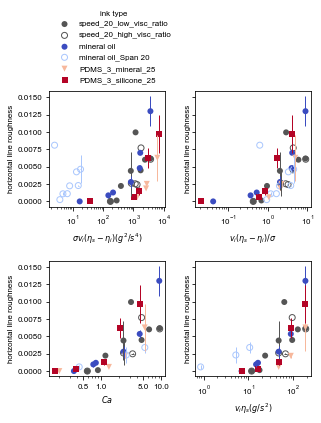

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [161]:
ssca = ss.copy()
ssca = ssca[ssca.sigma>0]
ssca.sort_values(by='sigma')
ssca = ssca[ssca.horiz_roughness_SE<0.1]
ssca = ssca[ssca.horiz_segments==3]
fig,axs = plt.subplots(2,2, figsize=(4.5,6), sharey=True)

ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0']-ssca['ink_visc0'])*ssca['sigma']
u['STrate'] = 'g^2/s^4'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[0][0], legend=True, fontsize=8)
axs[0][0].set_xlabel('$\sigma v_{i} (\eta_s-\eta_i) (g^2/s^4)$')

ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0']-ssca['ink_visc0'])/ssca['sigma']
u['STrate'] = ''
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[0][1], legend=False, fontsize=8)
axs[0][1].set_xlabel('$v_{i} (\eta_s-\eta_i)/\sigma $')

mp.sweepTypeSS(ssca, 'int_Ca', 'horiz_roughness',  logx=True, units=u, ax=axs[1][0], legend=False, fontsize=8)
axs[1][0].set_xlabel('$Ca$')

ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0'])
u['STrate'] = 'g/s^2'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[1][1], legend=False, fontsize=8)
axs[1][1].set_xlabel('$v_i \eta_s (g/s^2)$')

for axrow in axs:
    for ax in axrow:
        ax.set_ylabel('horizontal line roughness')
fig.tight_layout()

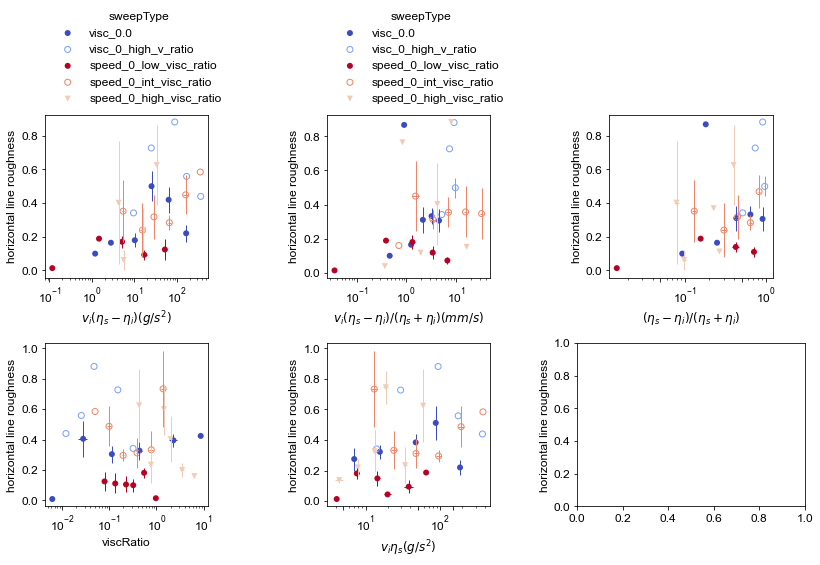

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [195]:
ssca = ss.copy()
ssca = ssca[ssca.sigma==0]
ssca = ssca[ssca.ink_type!='PEGDA_40']
ssca.sort_values(by='sweepType')
# ssca = ssca[ssca.horiz_roughness_SE<0.1]
ssca = ssca[ssca.horiz_segments==3]
fig,axs = plt.subplots(2,3, figsize=(12,8), sharey=False)
fs = 12
ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0']-ssca['ink_visc0'])
u['STrate'] = 'g^2/s^4'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[0][0], legend=True, fontsize=fs, dx=0.2)
axs[0][0].set_xlabel('$v_{i} (\eta_s-\eta_i) (g/s^2)$')

ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0']-ssca['ink_visc0'])/(ssca['sup_visc0']+ssca['ink_visc0'])
u['STrate'] = 'g^2/s^4'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[0][1], legend=True, fontsize=fs, dx=0.2)
axs[0][1].set_xlabel('$v_{i} (\eta_s-\eta_i)/(\eta_s+\eta_i) (mm/s)$')

ssca['STrate'] = (ssca['sup_visc0']-ssca['ink_visc0'])/(ssca['sup_visc0']+ssca['ink_visc0'])
u['STrate'] = 'g^2/s^4'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[0][2], legend=False, fontsize=fs, dx=0.2)
axs[0][2].set_xlabel('$(\eta_s-\eta_i)/(\eta_s+\eta_i)$')

mp.sweepTypeSS(ssca, 'viscRatio', 'horiz_roughness', logx=True, units=u, ax=axs[1][0], legend=False, fontsize=fs, dx=0.2)

ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0'])
u['STrate'] = 'g/s^2'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[1][1], legend=False, fontsize=fs, dx=0.2)
axs[1][1].set_xlabel('$v_i \eta_s (g/s^2)$')

for axrow in axs:
    for ax in axrow:
        ax.set_ylabel('horizontal line roughness')
fig.tight_layout()

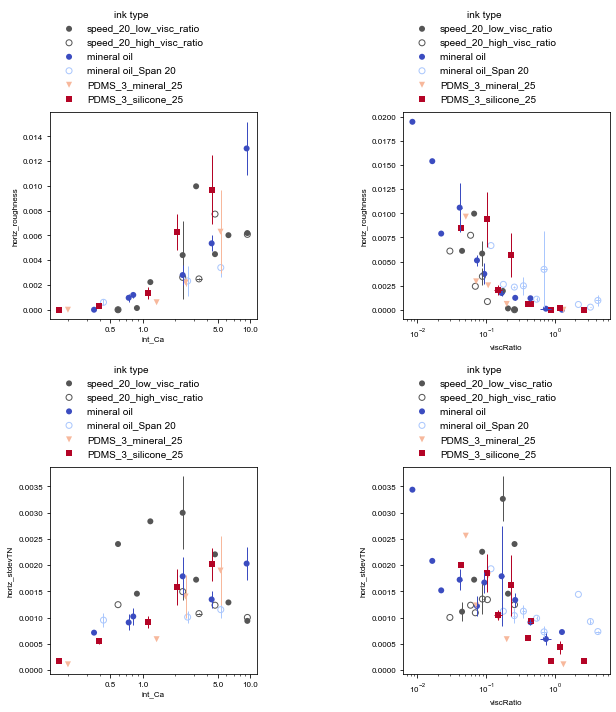

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [162]:
ssca = ss.copy()
ssca = ssca[ssca.sigma>0]
ssca.sort_values(by='sigma')
ssca = ssca[ssca.horiz_roughness_SE<0.1]
ssca = ssca[ssca.horiz_segments==3]
fig,axs = plt.subplots(2,2, figsize=(10,10))
for i,yvar in enumerate(['horiz_roughness', 'horiz_stdevTN']):
    for j, xvar in enumerate(['int_Ca', 'viscRatio']):
        mp.sweepTypeSS(ssca, xvar, yvar, ax=axs[i][j], logx=(j<2), units=u)
fig.tight_layout()

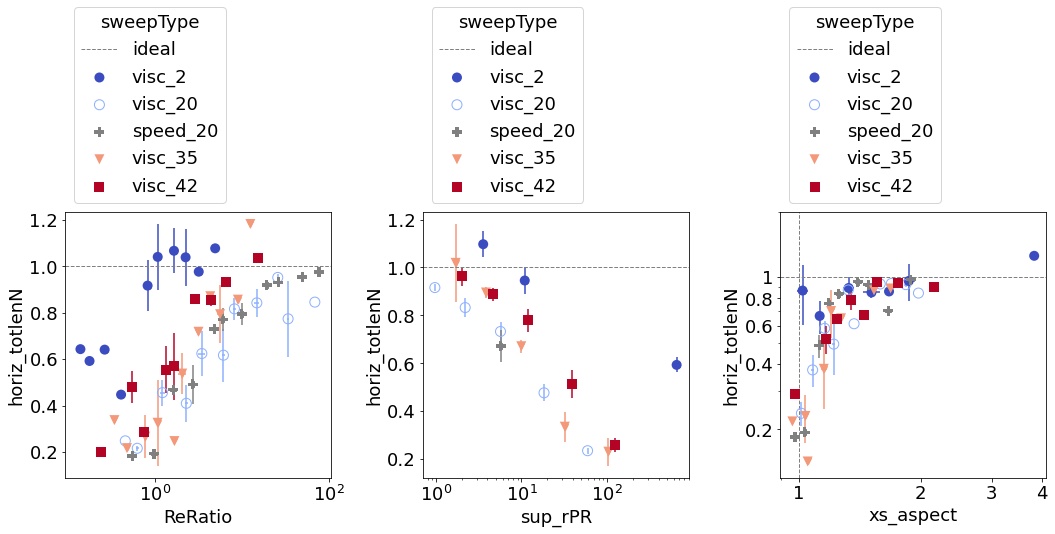

In [55]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
# ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sweepType', ascending=False)
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,3,figsize=(15, 10))

mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[0], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ss1, 'sup_rPR', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[1], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ss1, 'xs_aspect', 'horiz_totlenN', 'sweepType', logx=True, logy=True, yideal=(1), xideal=1, ax=axs[2], fig=fig, legend=True,  markersize=100, fontsize=18)
axs[2].set_xticks([1,2,3,4])
axs[2].set_xticklabels([1,2,3,4])
axs[2].set_ylim([0.12, 2])
axs[2].set_yticks([0.2, 0.4, 0.6, 0.8, 1])
axs[2].set_yticklabels([0.2, 0.4, 0.6, 0.8, 1])
mp.setSquare(axs[2])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'horiz_totlen.svg'), bbox_inches='tight', dpi=300)

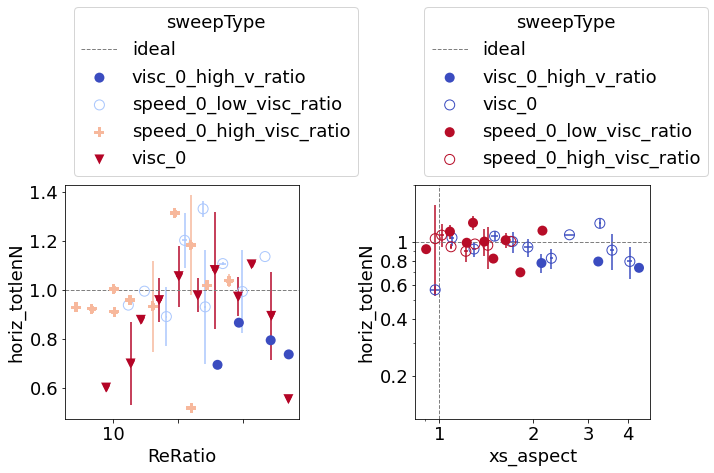

In [52]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.horiz_totlenN>0.5]
ss1 = ss1[ss1.horiz_totlenN_SE<0.5]
# ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sweepType', ascending=False)
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,2,figsize=(10, 10))
mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[0], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.sweepTypeSS(ss1, 'xs_aspect', 'horiz_totlenN', logx=True, logy=True, yideal=(1), xideal=1, ax=axs[1], fig=fig, legend=True,  markersize=100, fontsize=18)
axs[0].set_xticks([0.1, 1, 10], minor=True)
axs[0].set_xticklabels([0.1, 1, 10])
axs[1].set_xticks([1,2,3,4])
axs[1].set_xticklabels([1,2,3,4])
axs[1].set_ylim([0.12, 2])
axs[1].set_yticks([0.2, 0.4, 0.6, 0.8, 1])
axs[1].set_yticklabels([0.2, 0.4, 0.6, 0.8, 1])
mp.setSquare(axs[1])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'horiz_totlen_0.svg'), bbox_inches='tight', dpi=300)

In [32]:
me.printStillsKeys(vs)

Independents: ['sup_Ca', 'ink_Ca', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sweepType', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm']

Dependents: ['projectionN', 'projShiftN', 'vertDispBotN', 'vertDispTopN', 'vertDispMidN']


C:\Users\lmf1\Documents\GitHub\embedded3DPvids\py\metricPlots.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc['sweepType'] = [simplifyType(si) for si in s.loc['sweepType']]


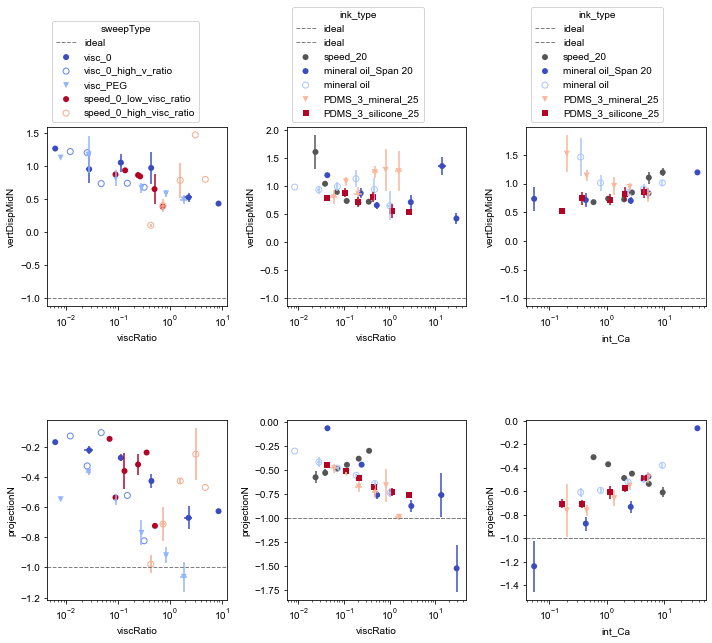

In [20]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
ss1 = vs.copy()
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.ink_days==1]
ssca = ss1[ss1.sigma>0]
mp.simplifyType(ssca)
sslap = ss1[ss1.sigma==0]
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(2,3,figsize=(10,10))
for k,ss0 in enumerate([sslap, ssca]):
    for i,s2 in enumerate(['viscRatio', 'int_Ca'][0:k+1]):
        for j,s in enumerate(['vertDispMidN', 'projectionN']):
            mp.sweepTypeSS(ss0, s2, s, logx=True, yideal=[-1, -1][j], ax=axs[j][i+k], fig=fig, legend=(j==0), dx=0.2)
fig.tight_layout()

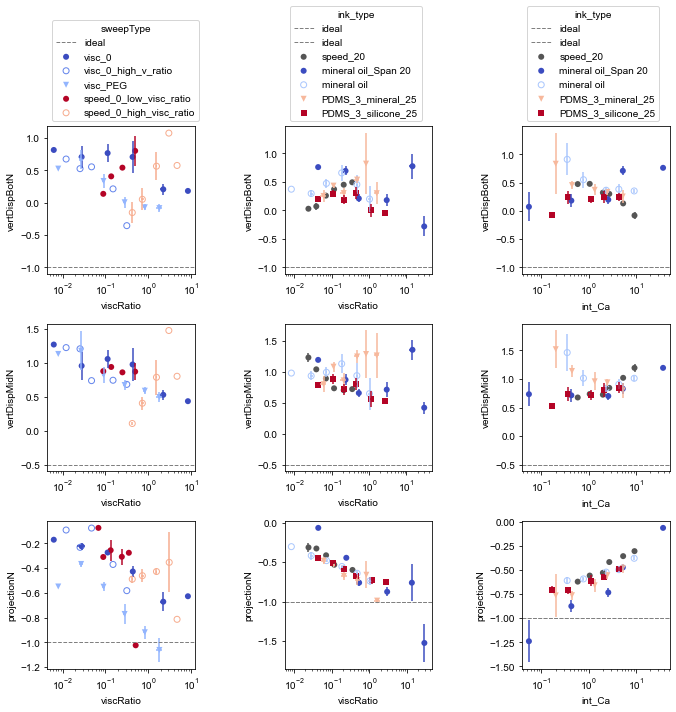

In [47]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
ss1 = vs.copy()
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.ink_days==1]
ssca = ss1[ss1.sigma>0]
mp.simplifyType(ssca)
sslap = ss1[ss1.sigma==0]
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(3,3,figsize=(10,10))
for k,ss0 in enumerate([sslap, ssca]):
    for i,s2 in enumerate(['viscRatio', 'int_Ca'][0:k+1]):
        for j,s in enumerate(['vertDispBotN', 'vertDispMidN', 'projectionN']):
            mp.sweepTypeSS(ss0, s2, s, logx=True, yideal=[-1, -0.5, -1][j], ax=axs[j][i+k], fig=fig, legend=(j==0), dx=0.2)
fig.tight_layout()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18053413848>)

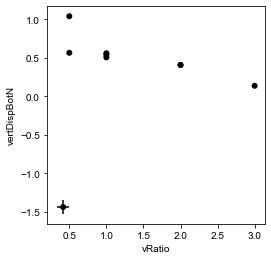

In [41]:
mp.scatterSS(vs[vs.sweepType=='speed_0_low_visc_ratio'], 'vRatio', 'vertDispBotN', '', dx=0, dy=0)

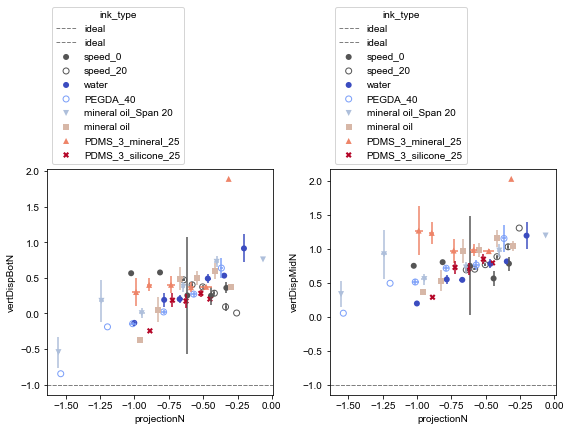

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [50]:
vs1 = vs.copy()
vs1.sort_values(by='sigma', inplace=True)
mp.simplifyType(vs1)
fig, axs = plt.subplots(1,2, figsize=(8,8))
mp.sweepTypeSS(vs1, 'projectionN', 'vertDispBotN',  dx=0.2, yideal=-1, ax=axs[0])
mp.sweepTypeSS(vs1, 'projectionN', 'vertDispMidN',  dx=0.2, yideal=-1, ax=axs[1])
fig.tight_layout()

In [38]:
vs1[(vs1.sweepType=='visc_2')&(vs1.vertDispBotN>0.5)&(vs1.viscRatio>10)][['bn', 'viscRatio', 'vertDispBotN', 'projectionN']]

,bn,viscRatio,vertDispBotN,projectionN
138,I_M5S_S_2.25T_211005,17.507732,0.997411,-0.361831
129,I_M4S_S_2.25T_211005,11.555566,0.554568,-0.749933


In [44]:
vs[(vs.sweepType=='speed_0_low_visc_ratio')&(vs1.vertDispBotN<-1)][['bn', 'vRatio', 'viscRatio', 'vertDispBotN', 'projectionN']]

,bn,vRatio,viscRatio,vertDispBotN,projectionN
278,I_2.75_S_2.75_VI_2.5_VS_7.5_210921,0.333333,0.729734,-1.348175,NaN
280,I_2.75_S_2.75_VI_5_VS_10_210921,0.500000,0.516760,-1.527136,NaN
